Materials used while working on this project:
1. Intro to Data Analysis course;
2. Intro to Statistics course;
3. Google (a lot!!!): links to Stackoverflow.com;
4. Matplotlib documentation;
5. I'm also reading the "Python for Data Analysis" book from Wes McKinney. The most helpful extract is the np.where() function for now. Most of techniques were covered by the Data Analysis course;


Disclaimers and assumptions:

1. Please put this notebook into the same folder with the baseball database;
2. I selected the Baseball data;
3. I have no idea about baseball :) Unfortunately baseball isn't popular in my country. I read a few links about rules, terms, etc. in order to get at least some understanding, but lots of things aren't clear to me.


Here I start to analyze the dataset. 
I will start with the two questions proposed by Udacity and then proceed with some of my own.

FIRST QUESTION: What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?

In [3]:
# Import modules:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

import math as mt


In [4]:
# Load the Teams table. I will try to look for some dependencies based on its data.
# A gentle remind: please make sure the Ipython notebook is in the same folder with the baseball stats DB!
#
teams = pd.read_csv('.\Teams.csv')

# Let's have a general look at the data to make sure there are no NaN values, abnormal values, etc.
#
# This is to make all dataframe columns visible when doing describe()
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format
print teams.describe()


        yearID     Rank        G    Ghome        W        L        R       AB  \
count 2,805.00 2,805.00 2,805.00 2,406.00 2,805.00 2,805.00 2,805.00 2,805.00   
mean  1,955.04     4.11   150.35    78.47    74.75    74.75   681.95 5,142.49   
std      41.52     2.32    23.23     4.70    17.64    17.38   135.74   750.55   
min   1,871.00     1.00     6.00    44.00     0.00     4.00    24.00   211.00   
25%   1,919.00     2.00   153.00    77.00    66.00    65.00   613.00 5,127.00   
50%   1,963.00     4.00   157.00    81.00    77.00    76.00   690.00 5,389.00   
75%   1,992.00     6.00   162.00    81.00    87.00    87.00   763.00 5,517.00   
max   2,015.00    13.00   165.00    84.00   116.00   134.00 1,220.00 5,781.00   

             H       2B       3B       HR       BB       SO       SB       CS  \
count 2,805.00 2,805.00 2,805.00 2,805.00 2,805.00 2,685.00 2,661.00 1,946.00   
mean  1,346.27   227.62    47.10   101.14   473.65   737.95   112.27    48.77   
std     219.89    58.69    

From the output I see the stats on numeric columns of the dataframe.
Based on the table description I identified several columns that I want to check for a possible correlation.
I see that the columns of my interest are numeric and don't seem to have any abnormal values such as 
strange max/min values; there are around 162 games per season indeed, etc.
I decide to proceed with the investigation.

In [5]:
# Here is my own function to calculate the Pearson's r. This is to show off that I understand the idea behind it.
# Later I will use scipy.stats.pearsonr if needed.
#
def pearsons_r(x, y):
    x_mean = x.mean() 
    y_mean = y.mean()

    numerator = ((x - x_mean)*(y - y_mean)).sum()
    denumerator = mt.sqrt((((x - x_mean)**2).sum())*(((y - y_mean)**2).sum()))
    
    return numerator / denumerator


In [6]:
# Here comes the list of performance metrics that I want to check for a correlation with wins/losses
perf_metrics = {'HR':'Homeruns by batters', \
                'R':'Runs scored', \
                'AB':'At bats', \
                'H':'Hits by batters', \
                '2B':'Doubles', \
                '3B':'Triples', \
                'BB':'Walks by batters', \
                'SO':'Strikeouts by batters', \
                'SB':'Stolen bases', \
                'CS':'Caught stealing', \
                'HBP':'Batters hit by pitch', \
                'SF':'Sacrifice flies', \
                'RA':'Opponents runs scored', \
                'ER':'Earned runs allowed', \
                'ERA':'Earned run average', \
                'SHO':'Shutouts', \
                'SV':'Saves', \
                'IPouts':'Outs Pitched (innings pitched x 3)', \
                'HA':'Hits allowed', \
                'HRA':'Homeruns allowed', \
                'BBA':'Walks allowed', \
                'SOA':'Strikeouts by pitchers', \
                'E':'Errors', \
                'DP':'Double Plays', \
                'FP':'Fielding  percentage'}

# Google helped to find out that r in [0.6; 0.79) is considered "strong" and r in [0.8; 1] considered "very strong".
# Let's look for strong or very strong correlation cases:
#
for metric in perf_metrics:
    rw = pearsons_r(teams[metric], teams['W'])
    rl = pearsons_r(teams[metric], teams['L'])
    if abs(rw) >= 0.6:
        print('{0} strongly correlates with Wins with the r of {1}'.format(perf_metrics[metric], rw))
    if abs(rl) >= 0.6:
        print('{0} strongly correlates with Losses with the r of {1}'.format(perf_metrics[metric], rl))


Fielding  percentage strongly correlates with Wins with the r of 0.644386876541
Walks by batters strongly correlates with Wins with the r of 0.655929187506
Outs Pitched (innings pitched x 3) strongly correlates with Wins with the r of 0.697275974552
Outs Pitched (innings pitched x 3) strongly correlates with Losses with the r of 0.637079166236
Hits allowed strongly correlates with Losses with the r of 0.741284949108
Opponents runs scored strongly correlates with Losses with the r of 0.686534196536
Earned runs allowed strongly correlates with Losses with the r of 0.726280274265
At bats strongly correlates with Wins with the r of 0.689233173606
At bats strongly correlates with Losses with the r of 0.63214887854
Hits by batters strongly correlates with Wins with the r of 0.725159672926
Walks allowed strongly correlates with Losses with the r of 0.667284744925
Runs scored strongly correlates with Wins with the r of 0.677242875886


Wow! It seems like we have several cases of a strong correlation! On the other hand, there are no cases of a very strong 
correlation. Let's look at the results more closely. Let me try to explain the results based on my dummy understanding
of baseball:

1. Fielding  percentage: the better defending team properly handles a batted or thrown ball the more chances to out the offending team, move to the offense, try to score and win. Makes sense;
2. Walks by batters: the more walks the offending team does, the more chances to score and win. Makes sense;
3. Outs Pitched: this one strongly correlates both with W and L. This is interesting. It probably means I shouldn't try to look for a reasonable correlation/dependency;
4. Hits allowed vs. L: right, the more hits the opposite team makes, the more chances they have to score and then win. Makes sense;
5. Opponents runs vs. L: similarly, the more runs the opposite team makes, the more chances they have to score and then win. Makes sense;
6. Earned runs vs. L: AFAIK, it has to do with a number of mistakes your team makes. The more mistakes you make, the more chances the opposite team has to score and win;
7. At bats: this one also strongly correlates both with W and L. It probably means I shouldn't try to look for a reasonable correlation/dependency;
8. Hits by batters: right, the more you hit, the more chances for a score and the W. Makes sense;
9. Walks allowed vs. L: the more walks you allow to the opposite team, the more chances they have to score and get the W;
10. Runs: sure, the more runs you make, the more chances to score and get the W. Makes sense.

In [7]:
# SECOND QUESTION: What are the characteristics of baseball players with the highest salaries?
#
salaries = pd.read_csv('.\Salaries.csv')
print salaries.describe()


         yearID        salary
count 25,575.00     25,575.00
mean   2,000.37  2,008,563.02
std        8.61  3,315,706.21
min    1,985.00          0.00
25%    1,993.00    275,000.00
50%    2,000.00    550,000.00
75%    2,008.00  2,250,000.00
max    2,015.00 33,000,000.00


Populating the interactive namespace from numpy and matplotlib


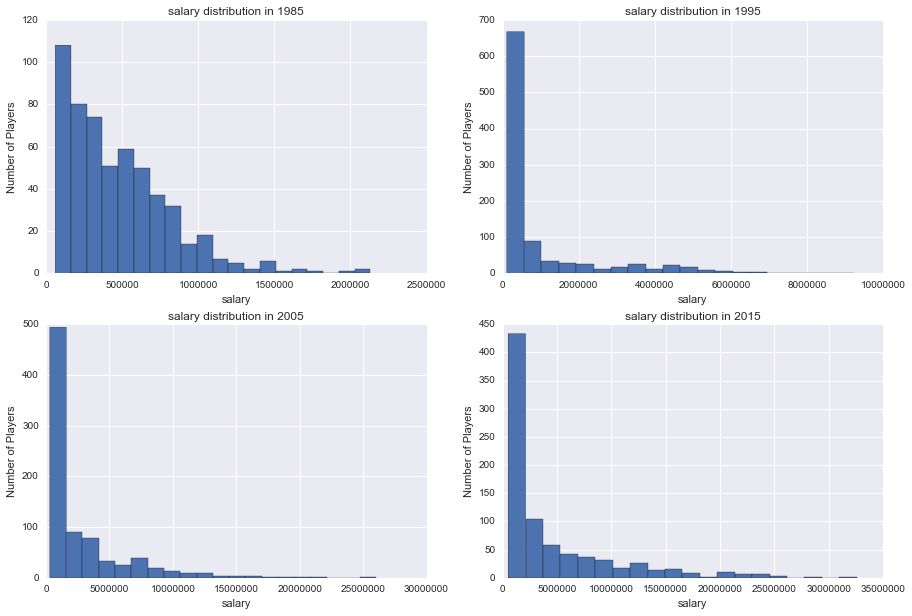

In [8]:
# Interesting note: the salary stats start in 1985. I should probably consider it in my analysis at some point...

# Let's look at the salary distribution in 1985, 1995, 2005 and 2015.
# Will we see anything interesting?
%pylab inline

def draw_hist(plot, data, condition, value, column):
    plot.get_xaxis().get_major_formatter().set_scientific(False)
    plot.hist(data[data[condition] == value][column], bins=20)
    plot.set_title('{0} distribution in {1}'.format(column, value))
    plot.set_xlabel(column)
    plot.set_ylabel('Number of Players')
    return None


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
draw_hist(ax1, salaries, 'yearID', 1985, 'salary')
draw_hist(ax2, salaries, 'yearID', 1995, 'salary')
draw_hist(ax3, salaries, 'yearID', 2005, 'salary')
draw_hist(ax4, salaries, 'yearID', 2015, 'salary')


Wow!!! How interesting!
From this plot I can clearly see at least the following:
1. Salaries grew a lot between 1985 and 1995;
2. Salaries grew a lot between 1995 and 2005;
3. The salary growth wasn't that big between 2005 and 2015;
4. The maximum salary grew a lot each 10 years;
5. There is a growth of the number of highly paid players (>USD10M) between 2005 and 2014;

In [9]:
# Let's do some data preparation. First of all, I need the list of players with the highest salaries.
def make_top_paid(salaries_data, topX):
    # Make a new dataframe by selecting top 10 salaries for each year.
    # Original indexes will move to the 'level_1' column
    top_salaries = salaries_data.groupby(['yearID'])['salary'].nlargest(topX).reset_index()
    
    # Here I drop all columns except 'level_1' which stores original indexes
    top_salaries_indexes = pd.DataFrame(top_salaries['level_1'])

    # Merge indexes with the original 'salaries' dataframe to get playerID
    # My solution seems to be dirty, but I didn't find any elegant way of doing it :(
    # Finally I have a subset of players where each player is in the Top 10 Salaries for the corresponding year
    result = pd.merge(salaries_data, top_salaries_indexes, how='inner', left_index=True, right_on='level_1')
    del result['level_1']

    return result

# I decided to start with top 10 salaries for each year.
top_paid_players = make_top_paid(salaries, 10)


In [10]:
# Let's do a short warm-up. Let's see if there are any appearances of Top Paid players in All Stars weekends.
allstars = pd.read_csv('.\AllstarFull.csv')

# Merge Top Paid players with all star stats, then group by year to get the number of Top Paid players appearances.
top_paid_allstar = pd.merge(allstars, top_paid_players, on=['playerID', 'yearID'])
top_paid_allstar_grouped = top_paid_allstar.groupby('yearID')['playerID'].count()

# Let's look at some high-level stats:
print top_paid_allstar_grouped.describe()


count   31.00
mean     5.26
std      1.55
min      3.00
25%      4.00
50%      5.00
75%      6.00
max      9.00
Name: playerID, dtype: float64


Wow!!! It seems like in average more than 50% of the Top 10 Paid players make to the All Star game!
Why is that? Is it because they play really well or people simple like them?
I will investigate it later in more details.
Let's also look at the plot. Is there anything interesting?

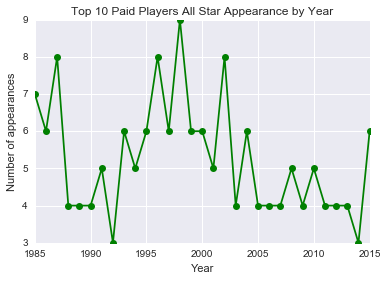

In [11]:
plt.xlabel('Year')
plt.ylabel('Number of appearances')
plt.title('Top 10 Paid Players All Star Appearance by Year')
plt.plot(top_paid_allstar_grouped, 'go-')

It seems to me that the average number of Top 10 Paid players appearances in All Star decreases over time.
As far as I know, in American professional sports (I follow NBA) salaries started to grow drastically in 2000s. Our histograms above just prove it, bingo!!! It became relatively easy for a young prospect to sign a long contract for many mil for several years. Then players lose a motivation or get injured, and their level falls down even though they still have a very good valid contract. 
I guess this might be the case here as well.
Let's have a closer look at the more detailed game stats of Top 10 Paid players.

My Google-based research revealed that:
1. The most important stats for pitchers are ERA (earned run average), SV (saves), CG (complete games) and SHO (shootouts).
2. The most important stats for batters are H (hits), HR (homeruns), RBI (runs batted in) and R (runs). There is also Batting Average (# of hits divided by # of at bats). There is no such stat in the file, so I will calculate it myself.

In [12]:
# Let's look at the pitchers stats first:
#
pitching = pd.read_csv('.\Pitching.csv')

# Let's make separate dataframe with the stats of top paid players
top_paid_pitching = pd.merge(pitching, top_paid_players, on=['playerID', 'yearID'])

# Let's see average ERA, SV, CG and SHO for all players by years starting 1985:
print pitching[pitching['yearID'] >= 1985].groupby('yearID')[['ERA', 'SV', 'CG', 'SHO']].mean()

# Let's see average ERA, SV, CG and SHO for top 10 paid players by years
print top_paid_pitching.groupby('yearID')[['ERA', 'SV', 'CG', 'SHO']].mean()


        ERA   SV   CG  SHO
yearID                    
1985   4.85 2.23 1.43 0.37
1986   4.62 2.22 1.28 0.31
1987   5.24 2.07 1.20 0.29
1988   4.45 2.28 1.35 0.39
1989   4.68 2.19 0.99 0.31
1990   4.97 2.14 0.82 0.27
1991   4.93 2.27 0.73 0.21
1992   4.50 2.34 0.88 0.31
1993   5.01 2.15 0.67 0.18
1994   5.67 1.58 0.52 0.14
1995   5.66 1.63 0.44 0.14
1996   5.65 1.89 0.49 0.14
1997   5.40 1.92 0.45 0.15
1998   5.86 2.03 0.48 0.16
1999   6.16 1.90 0.37 0.10
2000   6.42 1.74 0.35 0.11
2001   5.50 1.86 0.31 0.11
2002   5.41 1.86 0.32 0.13
2003   5.60 1.77 0.31 0.11
2004   5.72 1.81 0.22 0.10
2005   5.84 1.92 0.29 0.10
2006   5.55 1.72 0.21 0.09
2007   5.88 1.67 0.16 0.06
2008   5.16 1.69 0.19 0.08
2009   5.70 1.65 0.21 0.09
2010   5.31 1.76 0.24 0.09
2011   4.71 1.76 0.24 0.11
2012   5.27 1.75 0.18 0.10
2013   4.92 1.74 0.17 0.08
2014   5.10 1.69 0.16 0.09
2015   4.88 1.60 0.13 0.06
        ERA    SV    CG  SHO
yearID                      
1985   1.82 26.00  0.00 0.00
1986   5.19  1.33  0.3

I looked at average values of my 4 most important stats. As for the stats of all players - nothing caught my eye.
However, as for the Top Paid players pithing stats, I noted that:

1. all columns except ERA are pretty sparsed, especially SV;
2. there is one case of 26 saves (1985), which looks much above average;
3. there is one case of 13 complete games (1987), which also looks  above average;

Saves: I tend to think that Top 10 Paid players are either bad pitchers, so they weren't used is save situations, or 
they are better in something else, something more important.
I will investigate the case of 26 saves in 1985 separately to see if there is any mistake there.
I will also compare their basic ERA stat with the ERA stat of all players in order to understand if Top Paid players pitching 
skills are at the average level.

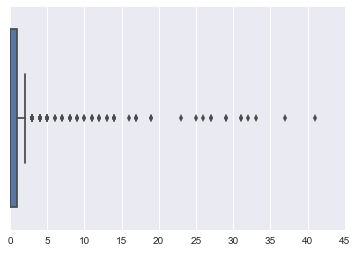

In [13]:
# Let's see more about there 26 saves in 1985.
# Let's draw a boxplot for saves in 1985:

sns.boxplot(pitching[pitching['yearID'] == 1985]['SV'].values)


It looks like there were not so many saves in average in 1985.
The average value of 2.23 that we saw above was probably because of several individual players who did many saves.
I see that the stat of 26 wasn't exceptional in 1985. There are even higher numbers.
This is a very good evidence of how outliers can affect the stats such as mean.

In [14]:
# And now let's look at the Saves among Top Paid players:
print top_paid_pitching[top_paid_pitching['yearID'] == 1985]

    playerID  yearID  stint teamID_x lgID_x  W  L   G  GS  CG  SHO  SV  \
0  gossari01    1985      1      SDN     NL  5  3  50   0   0    0  26   

   IPouts   H  ER  HR  BB  SO  BAOpp  ERA  IBB   WP  HBP  BK    BFP    GF   R  \
0  237.00  64  16   1  17  52   0.22 1.82 1.00 0.00 1.00   0 308.00 38.00  21   

   SH  SF  GIDP teamID_y lgID_y   salary  
0 nan nan   nan      SDN     NL  1713333  


In [15]:
# Wow!!! This stat was achieved by just one guy! Moreover, in 1985 there were no other pitchers in Top 10 Paid.
# Let's get his ID and try to find more stats from this guy:
outstanding_savers = top_paid_pitching[top_paid_pitching['yearID'] == 1985]['playerID']

print pitching[pitching['playerID'] == outstanding_savers[0]][['playerID', 'yearID', 'SV']]


        playerID  yearID  SV
20059  gossari01    1972   2
20430  gossari01    1973   0
20796  gossari01    1974   1
21161  gossari01    1975  26
21523  gossari01    1976   1
21891  gossari01    1977  26
22295  gossari01    1978  27
22694  gossari01    1979  18
23104  gossari01    1980  33
23496  gossari01    1981  20
23883  gossari01    1982  30
24290  gossari01    1983  22
24699  gossari01    1984  25
25116  gossari01    1985  26
25569  gossari01    1986  21
26021  gossari01    1987  11
26490  gossari01    1988  13
26961  gossari01    1989   4
26962  gossari01    1989   1
27980  gossari01    1991   1
28461  gossari01    1992   0
28956  gossari01    1993   1
29490  gossari01    1994   1


In [16]:
# It seems that this stat of 26 saves in 1985 wasn't a mistake. This guy had been showing similar (and sometimes even better)
# saves stats for many years. I guess he was really, really good and reliable in save situations.
# How many times was he in the Top 10 Paid list?
print top_paid_players[top_paid_players['playerID'] == outstanding_savers[0]]

   yearID teamID lgID   playerID   salary
4    1985    SDN   NL  gossari01  1713333


Only once, in 1985... I conclude that his unique skill in save situations wasn't enough to get well-paid.
To be absolutely sure it would make sense to look at other stats of this guy, but I will put this task aside and
switch to the ERA analysis.

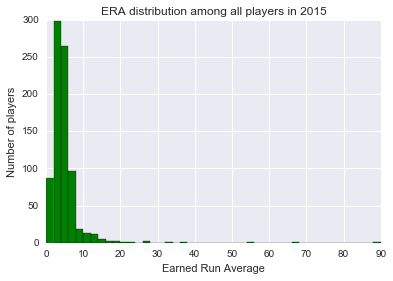

In [17]:
# Back to the pitching analysis.
# Let's look at the ERA distribution among all players in 2015.
# Why 2015? Well, seems like salaties are highest around 2015. I hope the stats are also better...

plt.hist(pitching[pitching['yearID'] == 2015]['ERA'].dropna(), bins=45, color='g')
plt.title('ERA distribution among all players in 2015')
plt.xlabel('Earned Run Average')
plt.ylabel('Number of players')

It seems that most pitchers have the ERA stat between 2 and 6.
Interesting to see that there are cases when pitchers have ERA of 20+, 30+, 50+ and even 80+.
I guess it's too bad...

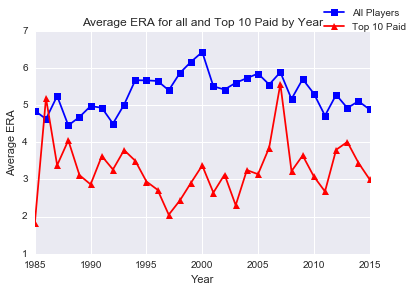

In [18]:
# Let's make a line plot of average ERA per yeaк for all players and a separate line for average ERA for Top 10 Paid guys:

fig = plt.figure()
plt.xlabel('Year')
plt.ylabel('Average ERA')
plt.title('Average ERA for all and Top 10 Paid by Year')
line1, line2 = plt.plot(pitching[pitching['yearID'] >= 1985].groupby('yearID')['ERA'].mean(), 'bs-', \
                        top_paid_pitching.groupby('yearID')['ERA'].mean(), 'r^-')
fig.legend((line1, line2), ('All Players', 'Top 10 Paid'), 'upper right')
                        

I see that the ERA for Top 10 Paid players is better in general (in this case lower: ERA means average number of earned runs) 
than the ERA for all players.
Let's see if this difference is statistically significant.
Central Limit Theorem says that the mean of all samples of the same size from the same population is approximately normally 
distributed, so I will apply the z test.
The all players are my population. Its mean (population_mean) and standard deviation are known.
The Top 10 Paid players are my sample. Its mean (sample_mean) is known.
My null hypothesis is: population_mean = sample_mean (that is, there is no significant difference between them)

In [19]:
# A function to calculate a z score
def z_score(population, sample):
    population_mean = population.mean()
    population_stdev = population.std()
    sample_mean = sample.mean()
    sample_size = len(sample)
    standard_error = population_stdev / (sample_size**0.5)
    
    return (sample_mean - population_mean) / standard_error

print z_score(pitching[pitching['yearID'] >= 1985]['ERA'], top_paid_pitching['ERA'])

-3.45583342338


At the confidence level of 95% my z critical value would be +/-1.96 for a two tail test.
In my case
-3.456 < -1.96,
so I reject the null hypothesis. The sample mean is significantly different from the population mean.
Moreover, the p value is approx 0.0003 (from the Z table), which means that the means are extremely significantly different.
Thus it's very unlikely that the sample was chosen by chance.
I conclude that Top 10 Paid players demonstrate a significantly better ERA stat for pitchers and it's not by chance.
Let's proceed to the batting.

In [20]:
# For the batting I will follow the same procedure than for the pitching except that I will calculate BA, Batting Average,
# and use it instead of H, hits.
#
batting = pd.read_csv('.\Batting.csv')

# Add the Batting Average stat:
batting['BA'] = batting['H'] / batting['AB']

top_paid_batting = pd.merge(batting, top_paid_players, on=['playerID', 'yearID'])

# Let's see average BA, R, HR and RBI for all players by years starting 1985:
print batting[batting['yearID'] >= 1985].groupby('yearID')[['BA', 'R', 'HR', 'RBI']].mean()

# Let's see average BA, R, HR and RBI for top 10 paid players by years
print top_paid_batting.groupby('yearID')[['BA', 'R', 'HR', 'RBI']].mean()


         BA     R   HR   RBI
yearID                      
1985   0.21 23.21 4.59 21.82
1986   0.21 23.01 4.73 21.58
1987   0.21 23.64 5.30 22.25
1988   0.20 21.27 3.89 19.85
1989   0.21 20.29 3.59 18.91
1990   0.21 20.50 3.80 19.23
1991   0.20 21.23 3.96 19.96
1992   0.21 20.67 3.62 19.41
1993   0.22 22.13 4.27 20.78
1994   0.23 19.59 4.11 18.48
1995   0.22 20.08 4.19 18.93
1996   0.22 23.34 5.07 22.06
1997   0.21 19.02 4.08 18.02
1998   0.20 19.24 4.18 18.23
1999   0.21 20.96 4.69 19.92
2000   0.21 18.04 4.11 17.15
2001   0.20 17.33 4.08 16.50
2002   0.20 16.99 3.84 16.17
2003   0.21 17.06 3.87 16.25
2004   0.19 17.37 4.05 16.53
2005   0.20 16.79 3.77 15.98
2006   0.21 17.13 3.91 16.32
2007   0.21 16.84 3.58 16.07
2008   0.20 16.31 3.52 15.55
2009   0.19 16.15 3.63 15.39
2010   0.20 15.71 3.40 14.96
2011   0.20 14.98 3.28 14.26
2012   0.19 14.93 3.50 14.20
2013   0.19 14.38 3.31 13.68
2014   0.19 13.77 2.92 13.06
2015   0.19 13.89 3.30 13.22
         BA     R    HR    RBI
yearID      

I didn't notice anything weird in average values.
Runs, homeruns and runs batted in are much higher than average.
Let's look at BA distributions at different years:

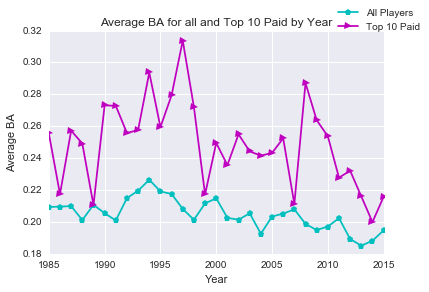

In [21]:
# Now I would like to further investigate Batting Average. Do Top Paid Players hit more often?
# Let's first draw a plot:

fig = plt.figure()
plt.xlabel('Year')
plt.ylabel('Average BA')
plt.title('Average BA for all and Top 10 Paid by Year')
line1, line2 = plt.plot(batting[batting['yearID'] >= 1985].groupby('yearID')['BA'].mean(), 'cp-', \
                        top_paid_batting.groupby('yearID')['BA'].mean(), 'm>-')
fig.legend((line1, line2), ('All Players', 'Top 10 Paid'), 'upper right')

Following the same logic as above, I see that the BA for Top 10 Paid players is better (higher: BA means how often players hit 
when at bat. The more the better) in general than the BA for all players.
Let's see if this difference is statistically significant using the same approach as for pitching.
My null hypothesis is: population_mean = sample_mean (that is, there is no significant difference between them)

In [22]:
# Calculate z score:
print z_score(batting[batting['yearID'] >= 1985]['BA'], top_paid_batting['BA'])

5.95917302972


At the confidence level of 95% my z critical value would be +/-1.96 for a two tail test.
In my case
5.959 > -1.96,
so I reject the null hypothesis. The sample mean is significantly different from the population mean.
Moreover, the p value is almost 0.0000 (from the Z table), which means that the means are extremely significantly different.
Thus it's very unlikely that the sample was chosen by chance.
I conclude that Top 10 Paid players demonstrate a significantly better BA stat for batters and it's not by chance.

CONCLUSION FOR THE TOP PAID PLAYERS ANALYSIS: Top 10 Paid players show significantly better ERA and BA stats for pitching and
batting respectively.

THIRD QUESTION: How does the number of Top Paid players affect the team performance?
By now we know that Top Paid players show several significantly better stats.
Is it so that teams having more Top Paid players win the League and World Series more often?

Let's have a look at all teams that won Leagues each year starting 1985 and compare:
- how many Top Paid players they have;
- how many games they won;
- which team won the World Series;

In [23]:
# Select only those years that have salary stats
teams = teams[teams['yearID'] >= 1985]

# Drop all teams that didn't win Leagues
teams = teams[teams['LgWin'] == 'Y']

# Let's use the list of Top 50 paid players for this excersise
top_50_paid = make_top_paid(salaries, 50)
top_players_per_team = top_50_paid.groupby(['yearID', 'teamID', 'lgID'], as_index=False)['playerID'].count()

# Merge data to get the Wins for each team in a season
# It can be that there are no players from the Top Paid list, so such teams won't appear in my group.
# I still want them to be there, so I do a left outer join.
# Then I replace NaN with zeros where there are no Top Paid players
teams_with_top_paid_players = pd.merge(teams, top_players_per_team, on=['yearID', 'teamID', 'lgID'], how='left')
teams_with_top_paid_players['playerID'].fillna(0, inplace=True)
teams_with_top_paid_players['playerID'] = teams_with_top_paid_players['playerID'].astype(int)

# New column to store the color of bubbles: red for WS Winner, blue otherwise
teams_with_top_paid_players['Winner'] = teams_with_top_paid_players.apply( \
                                        lambda x: 'r' if x['WSWin'] == 'Y' else 'b', axis=1)

# Now my data are ready for graphs

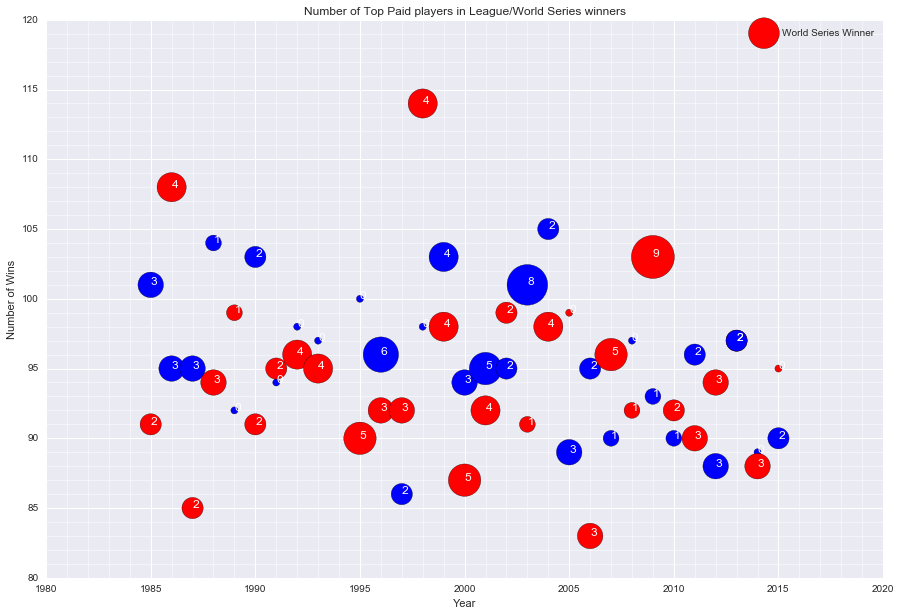

In [24]:
# Now comes the most difficult part: the visualization
# Increase the plot size to make it more readable
fig, ax = plt.subplots(figsize=(15, 10))

# Here comes the plot itself. The bubble size shows the number of Top Paid players
ax.scatter(teams_with_top_paid_players['yearID'], teams_with_top_paid_players['W'], \
            s=teams_with_top_paid_players['playerID']*200+50, c=teams_with_top_paid_players['Winner'])
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Number of Top Paid players in League/World Series winners')
plt.legend(labels=['World Series Winner'], loc=1)

# Now add minor grids. Again, to make it more readable
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

# Let's put an explicit number of Top Paid players into each bubble
for i, text in enumerate(teams_with_top_paid_players['playerID']):
    ax.annotate(text, (teams_with_top_paid_players['yearID'].iloc[i], teams_with_top_paid_players['W'].iloc[i]), \
                 fontsize=12, color='w')


Let's look at the results from another view of Pie Chart.
For each year I need to know who won WS that year: either a team with more Top Paid or less Top Paid.
I use a simple arithmetic trick for that: I extract the number of Top Paid of a losing team from the number of Top Paid of a winning team for each year.
If the difference is positive, then it means that the team with more Top Paid got the title.
Negative difference means that the team with less Top Paid got it.
Zero difference means teams had an equal number of Top Paid.

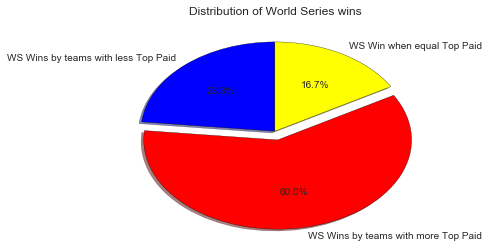

In [25]:
teams_with_top_paid_players['WS_Score'] = np.where(teams_with_top_paid_players['WSWin'] == 'Y', \
                                                   teams_with_top_paid_players['playerID'], \
                                                   0 - teams_with_top_paid_players['playerID'])

source_for_pie = teams_with_top_paid_players.groupby(['yearID'], as_index=False)['WS_Score'].sum()

# Now I need to prepare data for the pie chart to make it look good:
pie_size = float(len(source_for_pie))
labels = ['WS Wins by teams with less Top Paid', 'WS Wins by teams with more Top Paid', 'WS Win when equal Top Paid']
sizes = [len(source_for_pie[source_for_pie['WS_Score'] < 0]) / pie_size * 100, \
         len(source_for_pie[source_for_pie['WS_Score'] > 0]) / pie_size * 100, \
         len(source_for_pie[source_for_pie['WS_Score'] == 0]) / pie_size * 100]
colors = ['blue', 'red', 'yellow']
explode = (0, 0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of World Series wins')

Some notes that I can make from the scatter plot and pie chart:
1. For League winners:
- teams having more players from the Top Paid Players won the World Series in 60% cases in 1985-2015;
- teams having less players from the Top Paid Players won the World Series in 23.3% cases;
- teams having equal players from the Top Paid Players won the World Series in 16.7% cases;
2. Also, from the scatter plot I see that having more players of the kind doesn't mean more wins in the regular season compared to the other WS finalist;
3. In 2003 a team with 8 (eight) players from Top 50 Paid lost the final to a team with only 1 (one) such player;
4. There are interesting evidences when teams with no players from Top 50 Paid won the World Series: in 2008 and 2015;

I conclude that for two teams who won their Leagues having more players from Top Paid players list doesn't always mean winning the World Series.
Hovewer the team having more Top Paid players is more likely to win the title.

FOURTH QUESTION: From the Master table I see that there are three types of batters. They can be left-handed, right-handed and both-handed. I have already calculated the batting average for all players. Is there a significant difference between any two of these three groups?
IMPORTANT NOTE: a similar exercise is a part of the "Intro to Data Science" course. It was solved with a t-test. I will extend it to three options: left-handed, right-handed and both-handed.


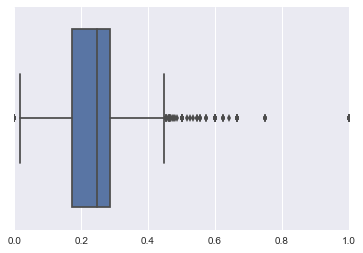

In [26]:
# Load the Master table:
master = pd.read_csv('.\Master.csv')

# Merge the Master table with the batting stats table:
ba_by_hand = pd.merge(master, batting, on=['playerID'])[['BA', 'bats']]

# There are NaN values. Let's drop them:
ba_by_hand.dropna(inplace=True)

# Let's check each group (L, R, B) for outliers using the box plot:
# For left-handed:
sns.boxplot(ba_by_hand[ba_by_hand['bats'] == 'L']['BA'].values)


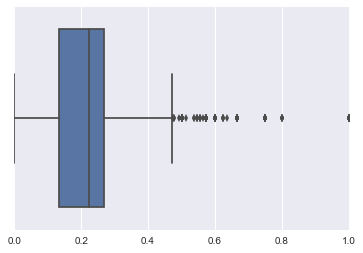

In [27]:
# For right-handed:
sns.boxplot(ba_by_hand[ba_by_hand['bats'] == 'R']['BA'].values)

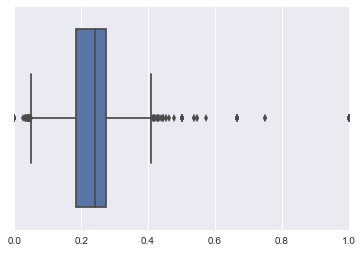

In [28]:
# For both-handed:
sns.boxplot(ba_by_hand[ba_by_hand['bats'] == 'B']['BA'].values)

It seems that all three data sets have outliers.
We'd better remove them as they could influence our ANOVA test.

In [29]:
# My function to remove outliers
# I will also drop all NaN values inside the function as well
def remove_outliers(data):
    data = data.sort_values().reset_index()
    del data['index']

    upper_quartile_index = int(len(data)/4.0*3.0)
    upper_quartile_value = data.loc[upper_quartile_index]

    lower_quartile_index = int(len(data)/4.0)
    lower_quartile_value = data.loc[lower_quartile_index]

    interquartile_range = upper_quartile_value - lower_quartile_value

    data = data[data <= upper_quartile_value + interquartile_range*1.5]
    data = data[data >= lower_quartile_value - interquartile_range*1.5]
    data.dropna(inplace=True)
    return data

left_handed_stats = remove_outliers(ba_by_hand[ba_by_hand['bats'] == 'L']['BA'])
right_handed_stats = remove_outliers(ba_by_hand[ba_by_hand['bats'] == 'R']['BA'])
both_handed_stats = remove_outliers(ba_by_hand[ba_by_hand['bats'] == 'B']['BA'])


Now we have all three datasets ready. Let's proceed to the one-way ANOVA test.
My null hypothesis is there is no significant difference between BA means for left-handed, right-handed and both-handed batters.
The alternative hypothesis is at least one pair of sample means is significally different from each other.
Let's do the test!

In [30]:
# means for each type of batters
meanL = left_handed_stats.values.mean()
meanR = right_handed_stats.values.mean()
meanB = both_handed_stats.values.mean()
# grand mean
meanG = (left_handed_stats.values.sum() + right_handed_stats.values.sum() + both_handed_stats.values.sum()) / \
        (len(left_handed_stats) + len(right_handed_stats) + len(both_handed_stats))

# sum of squares between groups
ss_between = len(left_handed_stats)*((meanL - meanG)**2) + \
            len(right_handed_stats)*((meanR - meanG)**2) + \
            len(both_handed_stats)*((meanB - meanG)**2)

# sum of squares within groups
ss_within = ((left_handed_stats.values - meanL)**2).sum() + \
            ((right_handed_stats.values - meanR)**2).sum() + \
            ((both_handed_stats.values - meanB)**2).sum()

# degrees of freedom. The DF between groups is obvious. We have 3 groups...
df_between = 2
df_within = (len(left_handed_stats) + len(right_handed_stats) + len(both_handed_stats)) - 3

print('Number of DF within groups: {0}'.format(df_within))

# mean of squares
ms_between = ss_between / df_between
ms_within = ss_within / df_within

# The F statistic:
F = ms_between / ms_within

print('The F statistic for this test is {0}'.format(F))

Number of DF within groups: 79711
The F statistic for this test is 2517.45241673


From the F table I got the following F critical value for df_between = 2, df_within = 79711 and alpha level of 0.05:
F_critical = 2.9957 

Thus my F statistic is much greater than the F critical value, so I reject the null.
My conclusion is at least one pair of means is significantly different from each other.
In order to find out which ones are these significantly different means one needs to take pair-wise tests.

Dear reviewer, I'm so tired! Can I put it aside and go home? :)
If not, please let me know. I will run the tests and let you know the result.

Analysis Limitations:

1. The first limitation that I noticed is that the salary data only start from 1985. For me it means that I can't use a lot of available stats from earlier years for any analysis related to top paid players;
2. Some tables have missing values. I faced it when making a histogram of the pitching ERA stat and had to use the dropna() method. Dealing with missing values always affects investigations. Let's look at two examples:
a) one solution is to just drop the missing values (the one I used). It has a contra of using a smaller set of statistics;
b) another solution is to replace them with some particular values (such as the mean). This could divert data in general;
3. The dataset doesn't include any per game statistics. It could make possible an additional research of 
a) whether any team plays better at home rather than when visiting;
b) whether any particular teams usually plays better against another particular team; 
c) whether any particular teams plays better against teams from another division;
d) whether a teams plays better in a certain part of the season (such as before/after All Star game, before/after trade deadline, etc.);
4. Relying solely on statistical calculations without making statistical tests has a limitation of providing data about a population that I didn't fully measure, and therefore I can't be completely sure that the values I calculated are really correct.